In [3]:
import pandas as pd

df = pd.read_csv('../data/dataset/코스피_전처리완.csv')
feature = df[df.columns[6:-1]]  # 벤포드는 제외

feature.head(2)

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/영업수익(%),현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,DEPI,SGAI,LVGI,TATA
0,100.0,7.03,2.75,183.57,107.57,11.23,94.57,46.53,4.39,-3.53,...,28.80,89.25,1.43,1.03,1.0,0.81,0.18,1.01,0.96,0.10
1,100.0,4.93,1.36,132.12,105.19,6.94,61.15,28.84,18.79,-16.70,...,26.34,80.01,2.19,1.13,1.0,1.28,0.17,1.02,1.03,0.12


In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

def check_normality(df):
    # 각 변수의 정규성 검정 결과 저장할 데이터프레임
    normality_results = pd.DataFrame(columns=['Variable', 'Shapiro-Wilk p-value', 'Normality'])
    
    # 각 컬럼에 대해 정규성 검정 실시
    for col in df.columns:
        # NaN 값 제거
        col_data = df[col].dropna()

        # Shapiro-Wilk 검정 수행
        stat, p_value = stats.shapiro(col_data)
        
        # p-value가 0.05보다 크면 정규성을 띤다고 판단
        is_normal = 'Yes' if p_value > 0.05 else 'No'
        
        # 결과 저장
        result = pd.DataFrame({'Variable': [col], 'Shapiro-Wilk p-value': [p_value], 'Normality': [is_normal]})
        normality_results = pd.concat([normality_results, result], ignore_index=True)
    
    return normality_results

# 시각화: 각 변수에 대해 Q-Q plot 그리기
def plot_qq(df):
    plt.figure(figsize=(15, len(df.columns) * 5))  # 전체 플롯 크기 설정
    
    for i, col in enumerate(df.columns):
        plt.subplot(len(df.columns), 1, i + 1)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {col}')
    
    plt.tight_layout()
    plt.show()

In [6]:
# 데이터프레임에 대해 정규성 검정 수행
normality_df = check_normality(feature)

# 결과 출력
print(normality_df)

c:\Users\Master\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normality_results = pd.concat([normality_results, result], ignore_index=True)


             Variable  Shapiro-Wilk p-value Normality
0           매출총이익률(%)          0.000000e+00        No
1            영업이익률(%)          0.000000e+00        No
2           당기순이익률(%)          0.000000e+00        No
3         자본금영업이익률(%)          0.000000e+00        No
4        영업수익/영업비용(%)          0.000000e+00        No
5    ROE(세전계속사업이익)(%)          0.000000e+00        No
6     자본금세전계속사업이익률(%)          0.000000e+00        No
7      자본금지배주주순이익률(%)          0.000000e+00        No
8     매출액증가율(전년동기)(%)          0.000000e+00        No
9    영업이익증가율(전년동기)(%)          0.000000e+00        No
10  당기순이익증가율(전년동기)(%)          0.000000e+00        No
11    총자본증가율(전년동기)(%)          0.000000e+00        No
12   유형자산증가율(전년동기)(%)          0.000000e+00        No
13            부채비율(%)          0.000000e+00        No
14            유동비율(%)          0.000000e+00        No
15            당좌비율(%)          0.000000e+00        No
16    현금및현금성자산구성비율(%)          0.000000e+00        No
17        유형자산구성비율(%)       

C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  plt.tight_la

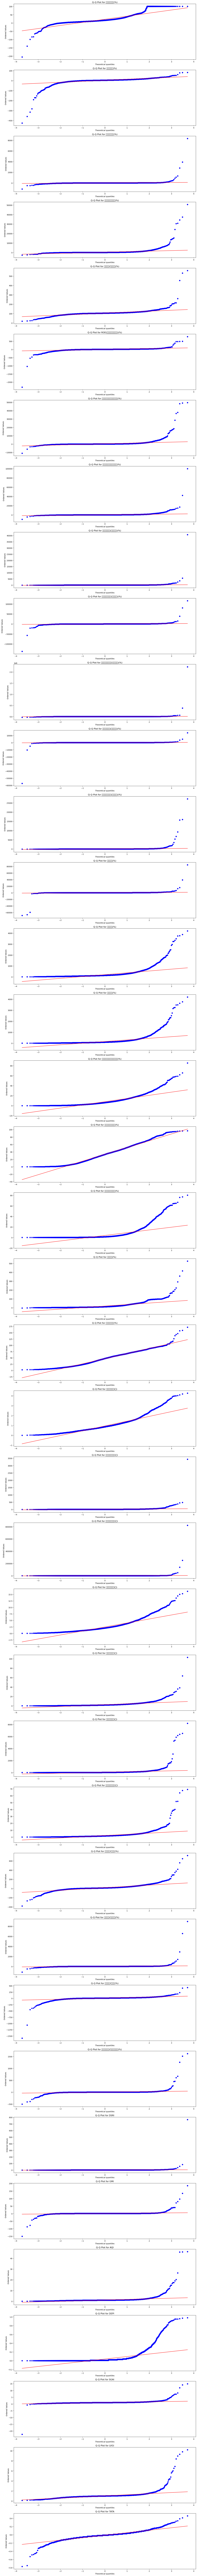

In [7]:
# Q-Q Plot 시각화
plot_qq(feature)

정규화 후 다시

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 데이터프레임의 선택된 컬럼에 정규화 적용
scaled_feature = scaler.fit_transform(feature)
df_scaled = pd.DataFrame(scaled_feature, columns = feature.columns)

In [14]:
df_scaled.describe()

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),ROE(세전계속사업이익)(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/영업수익(%),현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,DEPI,SGAI,LVGI,TATA
count,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,...,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7029.000000,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03,7.029000e+03
mean,1.657832e-16,8.086985e-18,1.010873e-18,2.021746e-17,-2.001529e-16,6.065239e-18,-1.010873e-17,-6.065239e-18,-4.043493e-18,1.516310e-18,...,-4.548929e-18,2.830445e-17,2.527183e-19,-2.021746e-18,0.000000,9.502208e-17,-4.852191e-17,-1.223157e-16,3.740231e-16,-3.335881e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.090156e+01,-2.973954e+01,-9.534040e+00,-2.381835e+00,-6.252443e+00,-5.178979e+01,-7.307586e+00,-6.489634e+00,-2.366248e-01,-5.267617e+01,...,-8.044401e+00,-4.565476e+01,-1.363313e+01,-1.283639e-01,-34.498495,-8.614578e-01,-4.217608e-01,-4.787315e+01,-2.593273e+00,-1.200700e+01
25%,-5.757416e-01,-1.396795e-01,-3.132346e-02,-2.178501e-01,-2.602490e-01,-5.447656e-02,-1.931314e-01,-1.436557e-01,-4.438297e-02,-1.174207e-02,...,-4.285651e-02,-1.081631e-01,-2.881596e-02,-3.412619e-02,-0.033951,-1.947458e-01,-4.217608e-01,-2.137458e-01,-2.488024e-01,-4.616630e-01
50%,-2.799523e-01,4.953451e-02,-8.660530e-03,-1.661719e-01,-5.006041e-02,7.290181e-02,-1.491955e-01,-1.110569e-01,-2.779685e-02,4.729876e-03,...,-1.950543e-02,4.606624e-02,-3.496595e-03,-2.221107e-02,-0.011115,-1.172212e-01,-3.102358e-01,-5.115512e-02,-7.725577e-02,1.280272e-02
75%,2.393542e-01,2.837995e-01,1.970949e-02,-3.686374e-02,2.270395e-01,2.103540e-01,-3.068926e-02,-2.439758e-02,-7.381615e-03,2.005655e-02,...,1.003510e-02,2.337740e-01,1.778245e-02,-9.212760e-03,0.011722,-1.643911e-02,-8.718590e-02,1.114356e-01,9.429084e-02,4.872685e-01
max,3.723255e+00,5.454263e+00,6.888401e+01,3.914705e+01,3.300046e+01,1.752262e+01,3.196393e+01,6.645799e+01,8.197460e+01,4.461272e+01,...,6.297799e+01,1.210057e+01,4.369235e+01,8.274994e+01,42.062484,3.490842e+01,1.050769e+01,2.823963e+01,2.619797e+01,7.446099e+00


In [15]:
# 데이터프레임에 대해 정규성 검정 수행
normality_scaled_df = check_normality(df_scaled)

# 결과 출력
print(normality_scaled_df)

             Variable  Shapiro-Wilk p-value Normality
0           매출총이익률(%)          0.000000e+00        No
1            영업이익률(%)          0.000000e+00        No
2           당기순이익률(%)          0.000000e+00        No
3         자본금영업이익률(%)          0.000000e+00        No
4        영업수익/영업비용(%)          0.000000e+00        No
5    ROE(세전계속사업이익)(%)          0.000000e+00        No
6     자본금세전계속사업이익률(%)          0.000000e+00        No
7      자본금지배주주순이익률(%)          0.000000e+00        No
8     매출액증가율(전년동기)(%)          0.000000e+00        No
9    영업이익증가율(전년동기)(%)          0.000000e+00        No
10  당기순이익증가율(전년동기)(%)          0.000000e+00        No
11    총자본증가율(전년동기)(%)          0.000000e+00        No
12   유형자산증가율(전년동기)(%)          0.000000e+00        No
13            부채비율(%)          0.000000e+00        No
14            유동비율(%)          0.000000e+00        No
15            당좌비율(%)          0.000000e+00        No
16    현금및현금성자산구성비율(%)          0.000000e+00        No
17        유형자산구성비율(%)       

c:\Users\Master\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normality_results = pd.concat([normality_results, result], ignore_index=True)


C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  plt.tight_layout()
C:\Users\Master\AppData\Local\Temp\ipykernel_20740\1272947102.py:35: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  plt.tight_la

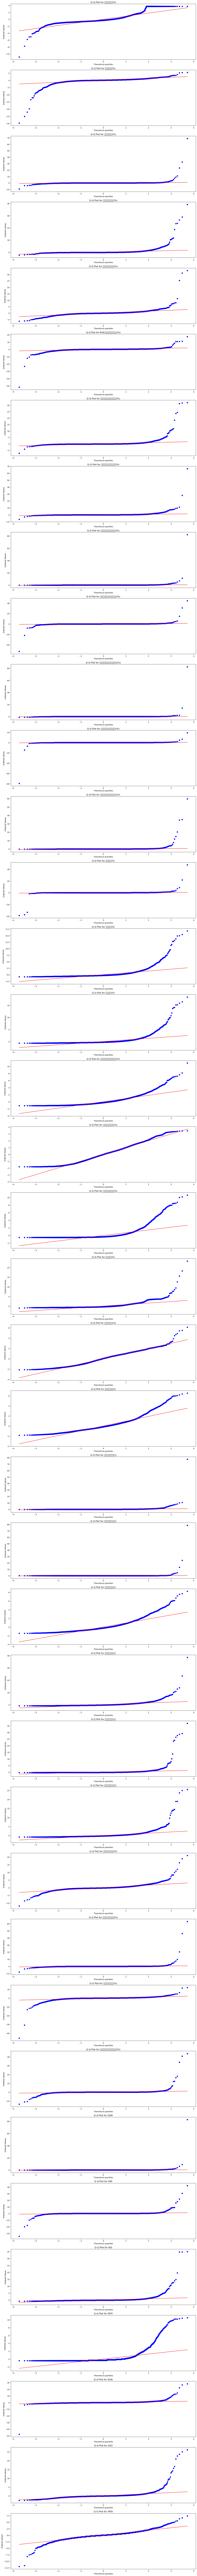

In [16]:
# Q-Q Plot 시각화
plot_qq(df_scaled)